In [1]:
try : 
    import matplotlib.pyplot as plt
except :
    !pip install matplotlib
    import matplotlib.pyplot as plt
    
try : 
    import nextcloud_client
except :
    !pip install pyncclient --quiet   
    import nextcloud_client
    
import requests
from urllib.request import urlopen
import re

exec(open('./connect_cloudUGA.py').read())
cloud = connect_cloudUGA()
list_f=cloud.list('ENSE3/DONNEES/STATION-METEO-OSUG-B/')
files=[list_f[i].path for i in range(len(list_f))]
for i in range(len(files)) :
    print(i ,files[i])

········
0 /ENSE3/DONNEES/STATION-METEO-OSUG-B/Campus_fr_OsugB_Mto_01_Min.dat
1 /ENSE3/DONNEES/STATION-METEO-OSUG-B/Campus_fr_OsugB_Mto_10_Min_20220214.dat


2022-02-14 00:00:00+00:00
2022-02-15 00:00:00+00:00
Event  0 :  2022-02-14 10:50:00  to  2022-02-14 17:30:00  : rain acc =  10.3


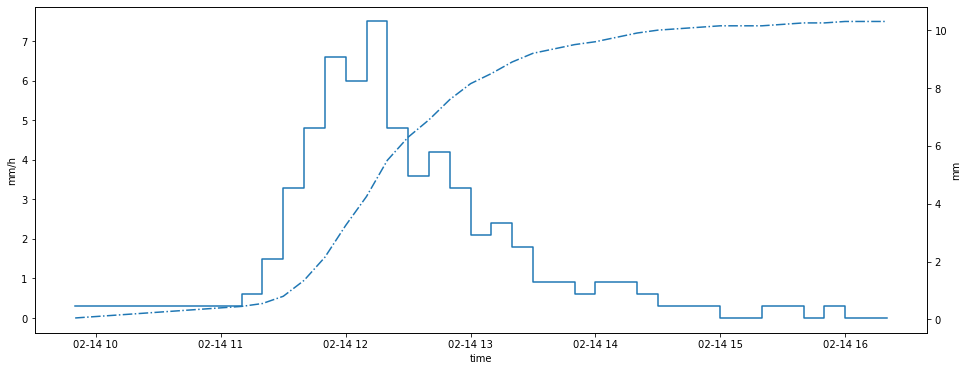

In [2]:
exec(open('./Meteo_utils/meteo.py').read())

mto_filename = return_long_url_file (cloud, files[0] )

mto=read_meteo_file(mto_filename,start="2022/02/14 00:00:00",stop="2022/02/15 00:00:00")
rain_gre = mto.Rain_mesure_Tot["data"].tz_localize('Europe/Paris')
rain_utc = rain_gre.tz_convert('UTC')
Pstarts,Pstops,Pacc = extrat_events(mto,sep_event=3600,min_acc=1)
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
ax1.plot(rain_utc[Pstarts[0][0]:Pstops[0][0]]*6,drawstyle="steps")
ax1.set_xlabel("time")
ax1.set_ylabel("mm/h")
ax2=ax1.twinx()
ax2.plot(rain_utc[Pstarts[0][0]:Pstops[0][0]].cumsum(),'-.')
ax2.set_ylabel("mm")
fig.show()

In [10]:
dir(mto)

['AirTemp_Avg',
 'RH_Avg',
 'Rain_mesure_Tot',
 'Ray_Global_Avg',
 'Trosee_Avg',
 'WDir_Avg',
 'WDir_Std',
 'WSpd_Avg',
 'WSpd_Max',
 '_ReaderMeteo',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'mto_filename',
 'name',
 'start',
 'stop',
 'time']

In [12]:
mto.methodes

AttributeError: 'MeteoReaderCampbell' object has no attribute 'methodes'